In [20]:
pip install pandas numpy yfinance matplotlib


In [21]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt


[*********************100%***********************]  1 of 1 completed
<ipython-input-22-ba00fbbb9582>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Signal'][short_window:] = np.where(data['Short_MA'][short_window:] > data['Long_MA'][short_window:], 1, 0)  # Buy signal


Total Strategy Return: 130.85%
Total Market Return: 112.93%


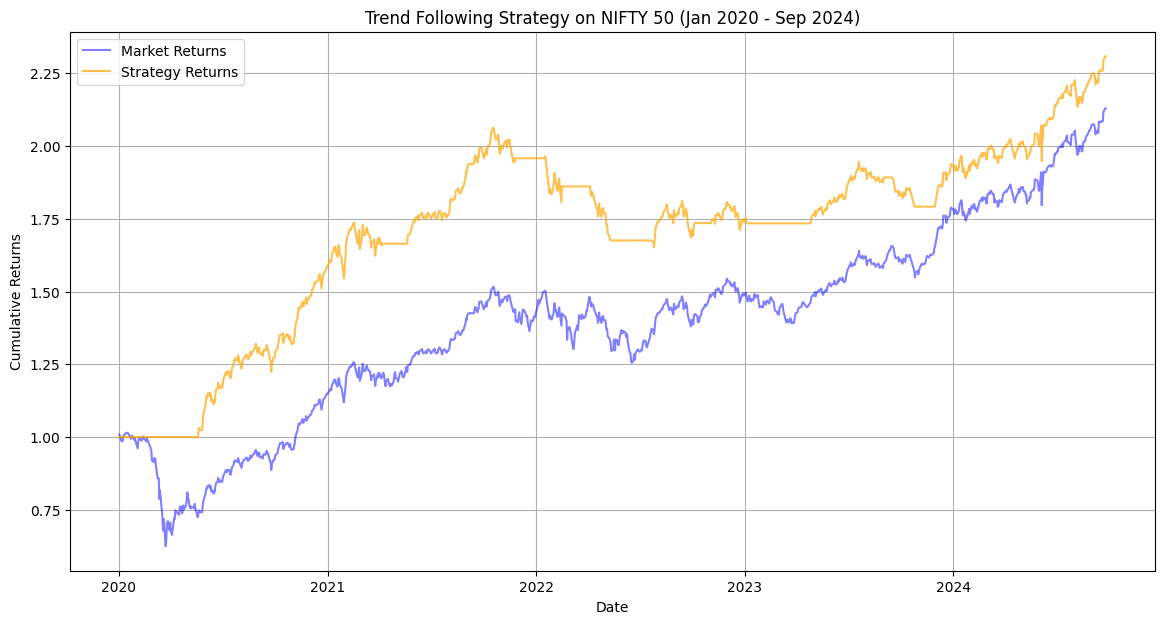

                   Close      Short_MA       Long_MA  Signal  \
Date                                                           
2024-09-11  24918.449219  24924.012305  24645.527891       1   
2024-09-12  25388.900391  24986.269824  24670.828906       1   
2024-09-13  25356.500000  25027.037305  24692.228906       1   
2024-09-16  25383.750000  25067.592285  24713.860898       1   
2024-09-17  25418.550781  25103.577344  24735.754922       1   
2024-09-18  25377.550781  25133.944922  24756.894922       1   
2024-09-19  25415.800781  25164.159961  24776.546953       1   
2024-09-20  25790.949219  25212.549902  24805.876953       1   
2024-09-23  25939.050781  25258.972461  24838.338984       1   
2024-09-24  25940.400391  25305.104980  24867.103984       1   

            Cumulative_Strategy_Returns  
Date                                     
2024-09-11                     2.217588  
2024-09-12                     2.259455  
2024-09-13                     2.256571  
2024-09-16           

In [22]:
# Define parameters
ticker = '^NSEI'  # NIFTY 50 index
short_window = 20  # Short moving average period
long_window = 50   # Long moving average period

# Fetch historical data
start_date = '2020-01-01'
end_date = '2024-09-25'  # Updated to current date
data = yf.download(ticker, start=start_date, end=end_date)
data['Returns'] = data['Close'].pct_change()

# Calculate moving averages
data['Short_MA'] = data['Close'].rolling(window=short_window).mean()
data['Long_MA'] = data['Close'].rolling(window=long_window).mean()

# Generate signals
data['Signal'] = 0
data['Signal'][short_window:] = np.where(data['Short_MA'][short_window:] > data['Long_MA'][short_window:], 1, 0)  # Buy signal
data['Position'] = data['Signal'].diff()  # Position change

# Backtesting the strategy
data['Market_Returns'] = data['Returns']
data['Strategy_Returns'] = data['Market_Returns'] * data['Signal'].shift()  # Align signals with returns

# Calculate cumulative returns
data['Cumulative_Market_Returns'] = (1 + data['Market_Returns']).cumprod()
data['Cumulative_Strategy_Returns'] = (1 + data['Strategy_Returns']).cumprod()

# Performance metrics
total_strategy_return = data['Cumulative_Strategy_Returns'].iloc[-1] - 1
total_market_return = data['Cumulative_Market_Returns'].iloc[-1] - 1

print(f"Total Strategy Return: {total_strategy_return:.2%}")
print(f"Total Market Return: {total_market_return:.2%}")

# Plotting the results
plt.figure(figsize=(14, 7))
plt.plot(data['Cumulative_Market_Returns'], label='Market Returns', color='blue', alpha=0.5)
plt.plot(data['Cumulative_Strategy_Returns'], label='Strategy Returns', color='orange', alpha=0.7)
plt.title('Trend Following Strategy on NIFTY 50 (Jan 2020 - Sep 2024)')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.grid()
plt.show()

# Display last few rows of the DataFrame for analysis
print(data[['Close', 'Short_MA', 'Long_MA', 'Signal', 'Cumulative_Strategy_Returns']].tail(10))
